In [ ]:
import spacy


In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def analyze_gender(sentence):
    he_count = 0
    she_count = 0
    they_count = 0
    l = 2

    doc = nlp(sentence)

    l_grams = [tuple(doc[i:i+l]) for i in range(len(doc)-l+1)]

    he_words = ["he", "him", "his"]
    she_words = ["she", "her", "hers"]
    they_words = ["they", "them", "their"]

    for gram in l_grams:
        words = [token.text.lower() for token in gram]
        if any(word in he_words for word in words):
            he_count += 1
        elif any(word in she_words for word in words):
            she_count += 1
        elif any(word in they_words for word in words):
            they_count += 1

    if he_count > she_count and he_count > they_count:
        gender = "M"
    elif she_count > he_count and she_count > they_count:
        gender = "F"
    else:
        gender = "N"

    return gender

csv_file_path = '/content/data.csv'
column_name = 'translated_hindi'

df = pd.read_csv(csv_file_path)

df[column_name] = df[column_name].astype(str)

df['Azure Translator gender'] = df[column_name].apply(analyze_gender)

output_csv_file_path = 'data.csv'
df.to_csv(output_csv_file_path, index=False)

print("Gender analysis completed and saved to", output_csv_file_path)


Gender analysis completed and saved to data.csv


In [ ]:
import spacy
import csv
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def analyze_gender_and_count_words(sentence):
    male_count = 0
    female_count = 0
    neutral_count = 0

    doc = nlp(sentence)

    male_pronouns = ["he", "him", "his"]
    female_pronouns = ["she", "her", "hers"]
    neutral_pronouns = ["they", "them", "their"]

    for token in doc:
        if token.text.lower() in male_pronouns:
            male_count += 1
        elif token.text.lower() in female_pronouns:
            female_count += 1
        elif token.text.lower() in neutral_pronouns:
            neutral_count += 1

    return male_count, female_count, neutral_count, len(doc)

csv_file_path = '/content/data.csv'
column_name = 'data'

df = pd.read_csv(csv_file_path)
df['data_male_count'], df['data_female_count'], df['data_neutral_count'], df['data_grams_count'] = zip(*df[column_name].apply(analyze_gender_and_count_words))  # Replace 'column_name' with the name of your text column

output_csv_file_path = 'output_file.csv'
df.to_csv(output_csv_file_path, index=False)

print("Gender-related word count completed and saved to", output_csv_file_path)


Gender-related word count completed and saved to output_file.csv


In [ ]:
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


def extract_adjectives_professions(sentence):
    adjectives = []
    professions = []
    words = word_tokenize(sentence)
    tagged_words = pos_tag(words)
    for word, pos in tagged_words:
        if pos == 'JJ':
            adjectives.append(word)
        elif pos.startswith('NN'):
            professions.append(word)
    return adjectives, professions

def process_csv_file(input_csv_file, output_csv_file):
    with open(input_csv_file, 'r') as infile, open(output_csv_file, 'w', newline='') as outfile:
        csv_reader = csv.reader(infile)
        csv_writer = csv.writer(outfile)


        header = next(csv_reader)
        header.extend(['Adjectives', 'Professions'])
        csv_writer.writerow(header)

        for row in csv_reader:
            sentence = row[0]
            adjectives, professions = extract_adjectives_professions(sentence)
            row.extend([' '.join(adjectives), ' '.join(professions)])
            csv_writer.writerow(row)

input_csv_file = 'data.csv'
output_csv_file = 'output_data.csv'
process_csv_file(input_csv_file, output_csv_file)


In [ ]:
import pandas as pd

df = pd.read_csv('Data.csv')

print("Value Counts for Column 9:")
print(df.iloc[:, 9].value_counts())

print("\nValue Counts for Column 10:")
print(df.iloc[:, 10].value_counts())


Value Counts for Column 9:
Gender Data-GT
MM    1587
FM    1249
FF     361
MN     209
FN     204
NM     140
NN     113
MF      25
Name: count, dtype: int64

Value Counts for Column 10:
Gender Data - AMT
MM    1627
FM    1273
FF     465
NN     445
MF      78
Name: count, dtype: int64


In [ ]:
import pandas as pd
df = pd.read_csv('output_data.csv')
print(df.iloc[:,13].value_counts())
print(df.iloc[:,14].value_counts())
print(df.iloc[:,15].value_counts())
print(df.iloc[:,5].value_counts())

Gender Data - GT
MM    1587
FM    1249
FF     361
MN     209
FN     204
NM     140
NN     113
MF      25
Name: count, dtype: int64
Gender Data - BMT N
MM    1627
FM    1273
FF     465
NN     207
MN     116
MF      78
FN      76
NM      46
Name: count, dtype: int64
Result N
MMMM    1464
FMFM    1113
FFFF     332
MNMM     145
FNFM     134
FMFF     112
NNNN     107
NMNN     100
MMMF      67
MNMN      60
MMMN      56
FNFN      49
NMNM      40
FFFM      26
FMFN      24
FNFF      21
MFMM      18
MFMF       7
NNNM       6
MNMF       4
FFFN       3
Name: count, dtype: int64
Google Translator gender
M    2976
N     526
F     386
Name: count, dtype: int64


In [ ]:
import pandas as pd

def merge_columns(input_csv_file, output_csv_file, column1, column2, new_column_name):
    df = pd.read_csv(input_csv_file)

    df[new_column_name] = df[column1].astype(str) + df[column2].astype(str)
    df.to_csv(output_csv_file, index=False)

# Example usage:
input_csv_file = 'data.csv'
output_csv_file = 'output_data.csv'
column1 = 'Gender Data-GT'
column2 = 'Gender Data - AMT'
new_column_name = 'Result'
merge_columns( output_csv_file,input_csv_file, column1, column2, new_column_name)


In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("Data.csv")

# Get the total number of entries (rows) in the DataFrame
total_entries = data.shape[0]

print("Total entries in the DataFrame:", total_entries)


Total entries in the DataFrame: 3888


In [ ]:
import pandas as pd

df = pd.read_csv('Data.csv')

print("Value Counts for Column 4:")
print(df.iloc[:, 4].value_counts())

print("Value Counts for Column 5:")
print(df.iloc[:, 5].value_counts())

print("Value Counts for Column 6:")
print(df.iloc[:, 6].value_counts())

print("Value Counts for Column 9:")
print(df.iloc[:, 9].value_counts())

print("\nValue Counts for Column 10:")
print(df.iloc[:, 10].value_counts())

Value Counts for Column 4:
Data gender
M    1821
F    1814
N     253
Name: count, dtype: int64
Value Counts for Column 5:
Google Translator gender
M    2976
N     526
F     386
Name: count, dtype: int64
Value Counts for Column 6:
Azure Translator gender
M    2946
F     543
N     399
Name: count, dtype: int64
Value Counts for Column 9:
Gender Data-GT
MM    1587
FM    1249
FF     361
MN     209
FN     204
NM     140
NN     113
MF      25
Name: count, dtype: int64

Value Counts for Column 10:
Gender Data - AMT
MM    1627
FM    1273
FF     465
NN     445
MF      78
Name: count, dtype: int64


In [ ]:
import pandas as pd

def merge_columns(input_csv_file, output_csv_file, column1, column2, new_column_name):
    df = pd.read_csv(input_csv_file)

    df[new_column_name] = df[column1].astype(str) + df[column2].astype(str)
    df.to_csv(output_csv_file, index=False)

# Example usage:
input_csv_file = 'output_data.csv'
output_csv_file = 'Data.csv'
merge_columns( output_csv_file,input_csv_file, 'Gender Data - GT', 'Gender Data - BMT N', 'Result N')


In [ ]:
MMM FMM FFF MNM FNM FMF NNN NMN MMF MNN MMN FNN NMM FFM FMN FNF MFM MFF NNM MNF FFN

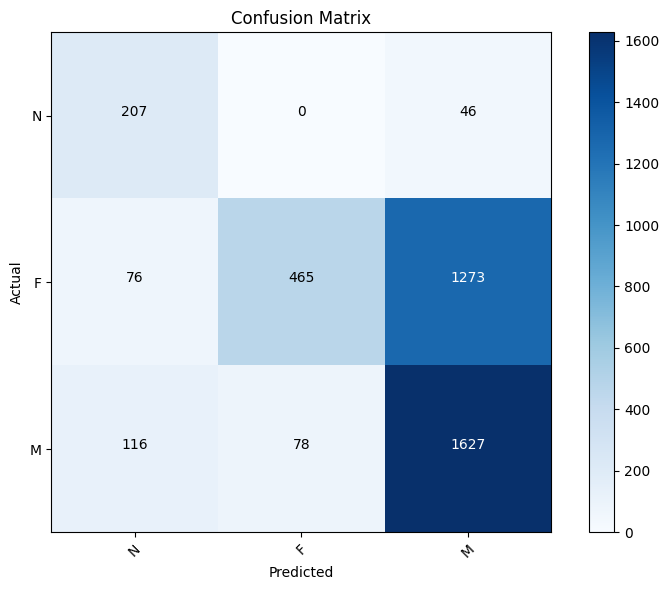

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample confusion matrix data (replace this with your own data)
conf_matrix = np.array([[207,0,46],
                        [76, 465, 1273],
                        [116, 78, 1627]])

46
0
207
1,273
465
76
1,627
78
116
# Define class labels
class_labels = ['N', 'F', 'M']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Fill cells with values
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()


In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
model.eval()

# Function to predict masked token
def predict_gender(sentence):
    # Tokenize input sentence
    tokenized_input = tokenizer.encode(sentence, add_special_tokens=True, return_tensors='pt')

    # Find masked token index
    masked_index = torch.where(tokenized_input == tokenizer.mask_token_id)[1].tolist()[0]

    # Predict masked token
    with torch.no_grad():
        outputs = model(tokenized_input)
        predictions = outputs.logits[0, masked_index].topk(k=5).indices.tolist()

    # Convert predictions to tokens
    predicted_tokens = tokenizer.convert_ids_to_tokens(predictions)

    # Check for gender-specific pronouns in predicted tokens
    gender_words = ['he', 'him', 'his', 'she', 'her', 'hers']
    gender = [token for token in predicted_tokens if token in gender_words]

    return gender

# Example usage
sentence = "The doctor talked to ___ patient about ___ symptoms."
gender = predict_gender(sentence)
print("Predicted gender:", gender)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


IndexError: list index out of range

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
model.eval()

# Function to predict masked token
def predict_gender(sentence):
    # Tokenize input sentence
    tokenized_input = tokenizer.encode(sentence, add_special_tokens=True, return_tensors='pt')

    # Find masked token index
    masked_index = torch.where(tokenized_input == tokenizer.mask_token_id)

    # Check if there is a masked token
    if masked_index[0].numel() > 0:
        masked_index = masked_index[1].tolist()[0]
    else:
        print("No masked token found in the input sentence.")
        return []

    # Predict masked token
    with torch.no_grad():
        outputs = model(tokenized_input)
        predictions = outputs.logits[0, masked_index].topk(k=5).indices.tolist()

    # Convert predictions to tokens
    predicted_tokens = tokenizer.convert_ids_to_tokens(predictions)

    # Check for gender-specific pronouns in predicted tokens
    gender_words = ['he', 'him', 'his', 'she', 'her', 'hers']
    gender = [token for token in predicted_tokens if token in gender_words]

    return gender

# Example usage
# Example usage
sentence = "The doctor talked to her about their symptoms."
gender = predict_gender(sentence)
print("Predicted gender:", gender)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


No masked token found in the input sentence.
Predicted gender: []


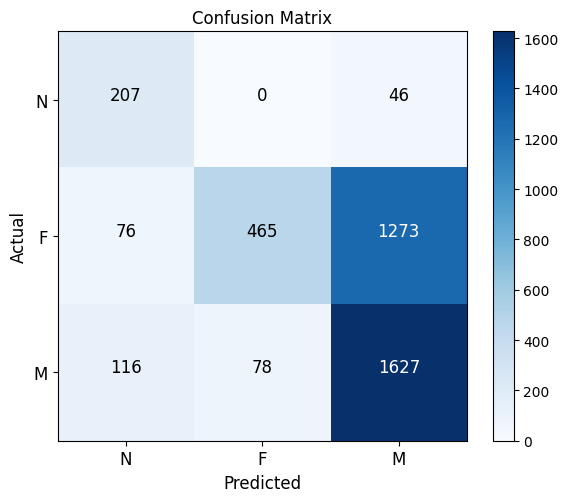

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample confusion matrix data (replace this with your own data)
conf_matrix = np.array([[207, 0, 46],
                        [76, 465, 1273],
                        [116, 78, 1627]])

# Define class labels
class_labels = ['N', 'F', 'M']

# Plot confusion matrix
plt.figure(figsize=(6, 5))  # Increase figure size for better readability
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)  # Use a color map that provides good contrast
plt.title('Confusion Matrix', fontsize=12)  # Increase title font size
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=0, fontsize=12)  # Increase x-axis label font size
plt.yticks(tick_marks, class_labels, fontsize=12)  # Increase y-axis label font size

# Fill cells with values and increase text size
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black",
                 fontsize=12)  # Increase text size for better visibility

plt.ylabel('Actual', fontsize=12)  # Increase y-axis label font size
plt.xlabel('Predicted', fontsize=12)  # Increase x-axis label font size
plt.tight_layout()
plt.savefig('confusion_matrix_BMT.png', dpi=300)  # Save with higher resolution
plt.show()


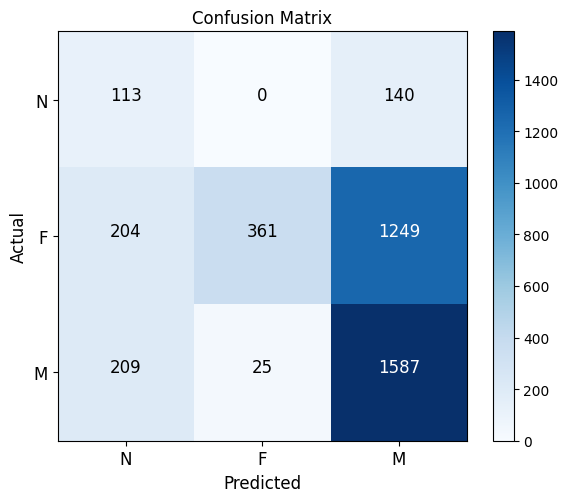

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample confusion matrix data (replace this with your own data)
conf_matrix = np.array([[113, 0, 140],
                        [204, 361, 1249],
                        [209, 25, 1587]])

# Define class labels
class_labels = ['N', 'F', 'M']

# Plot confusion matrix
plt.figure(figsize=(6, 5))  # Increase figure size for better readability
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)  # Use a color map that provides good contrast
plt.title('Confusion Matrix', fontsize=12)  # Increase title font size
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=0, fontsize=12)  # Increase x-axis label font size
plt.yticks(tick_marks, class_labels, fontsize=12)  # Increase y-axis label font size

# Fill cells with values and increase text size
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black",
                 fontsize=12)  # Increase text size for better visibility

plt.ylabel('Actual', fontsize=12)  # Increase y-axis label font size
plt.xlabel('Predicted', fontsize=12)  # Increase x-axis label font size
plt.tight_layout()
plt.savefig('confusion_matrix_GT.png', dpi=300)  # Save with higher resolution
plt.show()
